## Introduction

The purpose of this project is to create a machine learning model that is able to correctly predict with a high enough accuracy whether a person is at risk of a heart-attack based on varying factors such as their age, gender, and more. 

We want to answer the question of whether heart-attacks are sudden onset attacks that happen at random or are predictable and...

# Imports

In [52]:
import pandas as pd
import seaborn as sns

First, we should highlight the details of the dataset we currently possess. This includes size, attributes, and logistics.

This means whether an attribute is continous, discrete and more.

In [53]:
df = pd.read_csv('./heart.csv')
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [54]:
print(f'There are {df.shape[0]} people that are included in this dataset and we are provided with {df.shape[1]} attributes to work with\n')

There are 303 people that are included in this dataset and we are provided with 14 attributes to work with



In [55]:
# numerical data
numerical_data = df.loc[:, ~(df == 0).any()]
numerical_data

,age,trtbps,chol,thalachh
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163
...,...,...,...,...
298,57,140,241,123
299,45,110,264,132
300,68,144,193,141
301,57,130,131,115


In [56]:
categorical_data = df.loc[:, (df == 0).any()]
categorical_data


,sex,cp,fbs,restecg,exng,oldpeak,slp,caa,thall,output
0,1,3,1,0,0,2.3,0,0,1,1
1,1,2,0,1,0,3.5,0,0,2,1
2,0,1,0,0,0,1.4,2,0,2,1
3,1,1,0,1,0,0.8,2,0,2,1
4,0,0,0,1,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,0.2,1,0,3,0
299,1,3,0,1,0,1.2,1,0,3,0
300,1,0,1,1,0,3.4,1,2,3,0
301,1,0,0,1,1,1.2,1,1,3,0


C:\Users\jason\AppData\Local\Temp\ipykernel_20472\142904074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.loc[:, 'sex'] = df['sex']


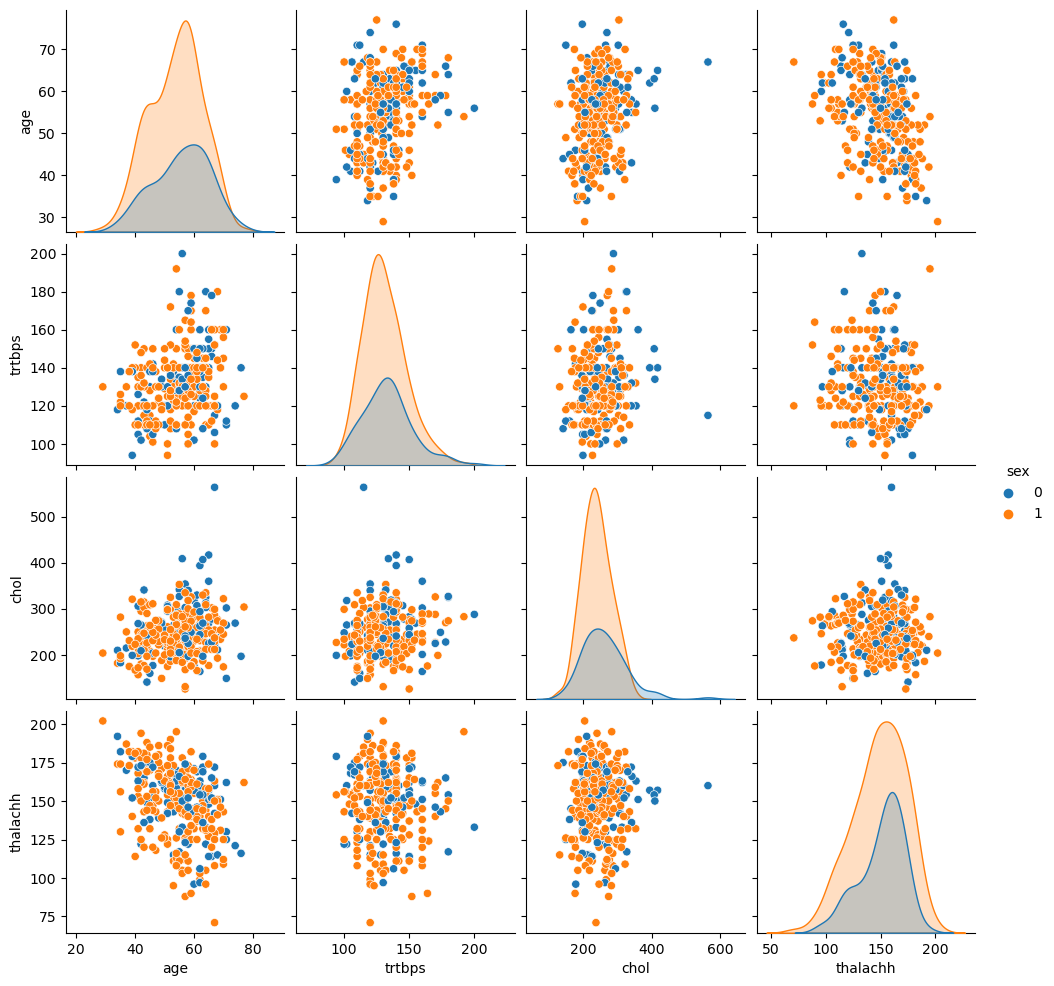

In [67]:
numerical_data.loc[:, 'sex'] = df['sex']
sns.pairplot(numerical_data, hue = 'sex')

# Data Details (Numerical)
Age is a numerical attribute that describes the person's age. This is relevant due to the evidence that suggests that once a person is over the age of 50, their health declines and thus the onset of heart-disease increases dramatically

Trtbps is a continous attribute that represents resting blood pressure (in mm Hg). This is relevent because 

Chol (Cholesterol) is a continous attribute that represents the amount of cholestoral in mg/dl fetched via BMI sensor. This is relevent because

Thalch (maximum heart rate achieved) is a continous attribute.


# Data Details (Categorical )
    Sex is a categorical attribute that uses binary to represent a person's gender. This is relevant because there is evidence to also suggest that men are more susceptible to heart-disease compared to females.

    fbs (Fasting Blood Sugar) is a categorical attribute that represents the amount of fasting blood sgugar in a person's body. The values consist of 1 and 0 and is true if the fasting blood sugar is > 120 mg/dl

    restceg resting electrocardiographic results . Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


    exng (exercise induced angina) is a categorical attribute

    oldpeak categorical ST depression induced by exercise relative to rest

    slp catge the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)
 
    caa number of major vessels (0-3) colored by flourosopy

    thall - 2 = normal; 1 = fixed defect; 3 = reversable defect

    Output is a discrete attribute that has values of either 0 and 1 and describes whether the person is at risk of having a heart-attack or not.